# Week8 - Decision Tree, KNN, NB, SVM Homework

* Do a quick EDA to understand your data and explain what you need for your pipeline.
* Explain what metric would be appropriate for this task (1 sentence).
* Explain your game plan
* Create a preprocessing pipeline (without the model).

* Train-test split
* Create pipelines for the following models and use preprocessing pipeline you created in the previous step
    - Decision Trees
    - Random Forests
    - KNN
    - NB
    - SVM
  
* Define params for GridSearchCV for all models
* Evaluate the models

* Explain findings

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [219]:
# DON'T CHANGE ANYTHING HERE....
random.seed(42)
def remove_values(df, cols, perc=0.001):
    for i in cols:
        mask = pd.Series(random.choices([0,1], weights=[perc, 1-perc], k=len(df[i])))
        df[i] = [ x if i==1 else None for x, i in zip(df[i], mask)]

def create_df(size=1000000):
    from sklearn.datasets import make_classification

    X, y = make_classification(
        n_samples=size,
        n_features=5,
        n_informative=5,
        n_redundant=0,
        n_classes=2,
        flip_y=0.2,
        random_state=4
    )
    
    df = pd.DataFrame(X)
    df.columns = ['f1', 'f2', 'f3', 'f4', 'f5']
    df.f1 = df.f1**2
    df.f2 = df.f2**2
    df.f3 = df.f3*1000
    
    flag = random.choices([True, False], weights=[0.65, 0.35], k=len(y))
    f6 = ['A' if i == 0 else 'B' for i in y]
    
    f6 = [f if i else ('B' if f=='A' else 'A') for i,f in zip(flag, f6)]
    df['f6'] = f6
    
    remove_values(df, df.columns, perc=0.05)
    
    return df, pd.Series(y)
    
X, y = create_df()

In [220]:
# eda code
X.head()

,f1,f2,f3,f4,f5,f6
0,3.083178,3.022878,1276.390696,-2.672085,1.085629,B
1,NaN,1.764094,-873.709051,2.084035,0.387268,A
2,8.663599,NaN,-563.461158,-0.044922,2.512673,A
3,NaN,3.899908,753.129656,1.565944,-3.771516,A
4,0.684772,22.623978,-392.739840,-0.136113,-2.028027,A


In [221]:
print(X.describe(include='all'))

                  f1            f2             f3             f4  \
count   9.499330e+05  9.498840e+05  949804.000000  950444.000000   
unique           NaN           NaN            NaN            NaN   
top              NaN           NaN            NaN            NaN   
freq             NaN           NaN            NaN            NaN   
mean    2.970269e+00  2.698242e+00       1.203865      -0.002337   
std     4.223559e+00  3.863111e+00    1441.308642       1.682211   
min     7.464873e-15  4.200556e-12   -6319.721066      -8.364699   
25%     3.265102e-01  3.144912e-01   -1077.181298      -1.172712   
50%     1.415231e+00  1.310581e+00    -403.563631       0.067817   
75%     3.905995e+00  3.501739e+00    1009.950057       1.156616   
max     9.069379e+01  8.512300e+01    7402.596849       9.717087   

                   f5      f6  
count   950149.000000  949983  
unique            NaN       2  
top               NaN       B  
freq              NaN  475044  
mean        -0.000394  

In [222]:
# missing value proportion
missing = X.isnull().mean().sort_values(ascending=False)
print(missing)


f3    0.050196
f2    0.050116
f1    0.050067
f6    0.050017
f5    0.049851
f4    0.049556
dtype: float64


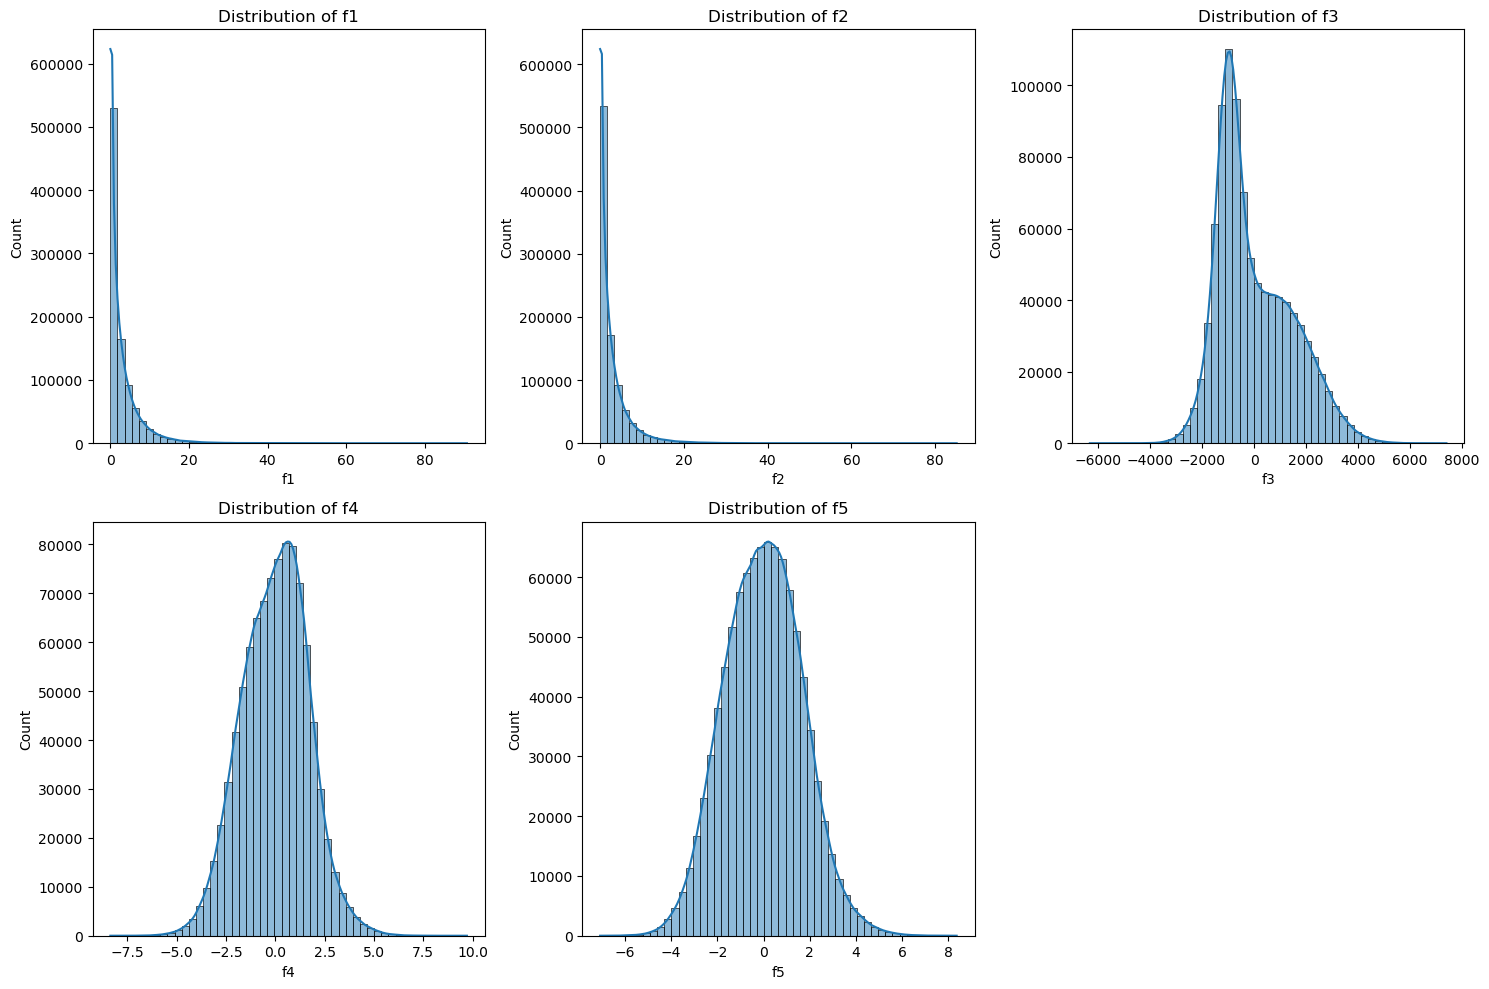

In [223]:
# distribution of different features
features = ['f1', 'f2', 'f3', 'f4', 'f5']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(X[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


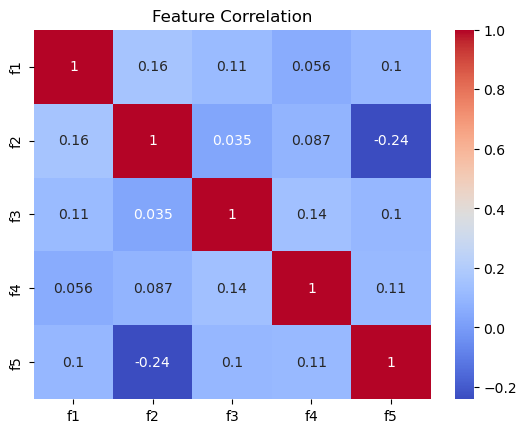

In [224]:
sns.heatmap(X.drop(columns=['f6']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


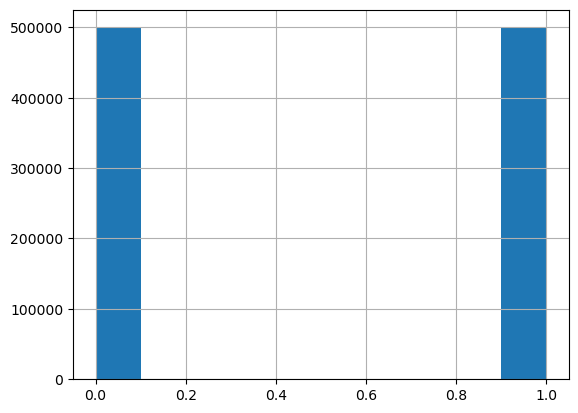

In [225]:
y.hist()
plt.show()

In [226]:
X.isna().sum()

f1    50067
f2    50116
f3    50196
f4    49556
f5    49851
f6    50017
dtype: int64

Explainations...An appropriate metric for this binary classification task is the F1 score, as it balances precision and recall.

Explain your gameplan...Step 1: Understand the Data by EDA; Step 2: Impute missing values-Encode Categorical-Scale Numerical.

In [229]:
# create processing pipeline

In [230]:
# 1. Define feature types
num_features = ['f1', 'f2', 'f3', 'f4', 'f5']
cat_features = ['f6']

# 2. Pipelines for each type
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())  
])

# 3. Combine pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])
X_preprocessed = preprocessor.fit_transform(X)


## HW

Some of the stub code added. Complete it and add the code for the missing models.

In [232]:
Xs = X[:10000]
ys= y[:10000]

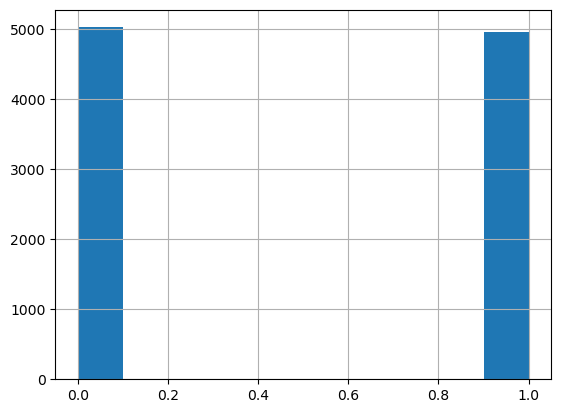

In [233]:
ys.hist()
plt.show()

In [234]:
# Decision Tree
dt_modeling_pipeline = Pipeline([
    ('data_processing', preprocessor),
    ('ml', DecisionTreeClassifier())]
)
dt_modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3', 'f4',
                                                   'f5']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['f6'])])),
                ('ml', DecisionTreeClassifier())])

In [235]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xs, ys, test_size=0.2, random_state=42, stratify=ys
)

In [236]:

dt_param_grid = [
    {
        'ml__max_depth' : [5, 10 ,15],
        'ml__min_samples_split': [2, 5, 10, 15, 20]
    }
]

scoring ='f1'

dt_gc = GridSearchCV(estimator=dt_modeling_pipeline, param_grid=dt_param_grid, cv=5, scoring=scoring)
dt_gcv_results = dt_gc.fit(X_train, y_train)

In [237]:
dt_gcv_results.best_params_

{'ml__max_depth': 10, 'ml__min_samples_split': 10}

In [238]:
dt_gcv_results.score(X_train, y_train)

0.874513252104007

In [239]:
dt_gcv_results.score(X_test, y_test)

0.7623811905952976

There's a performance gap (~10%), suggesting overfitting.
The decision tree likely memorized patterns in the training set but doesn’t generalize well. 
How I addressed it: 
1. Applied a preprocessing pipeline with proper imputation and scaling to handle missing values and standardize features.
2. Used GridSearchCV to tune hyperparameters (max_depth, min_samples_split) to reduce overfitting.

In [241]:
# random forest
rf_modeling_pipeline = Pipeline([
    ('data_processing', preprocessor),
    ('ml', RandomForestClassifier())]
)
rf_modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3', 'f4',
                                                   'f5']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['f6'])])),
                ('ml', RandomForestClassifier())])

In [242]:
rf_param_grid = [
    {
   'ml__n_estimators': [50, 100, 150],
    'ml__max_depth': [10, 20, None],
    'ml__min_samples_split': [2, 5, 8, 10]
    }
]

scoring = 'f1'

rf_gc = GridSearchCV(estimator=rf_modeling_pipeline, param_grid=rf_param_grid, cv=5, scoring=scoring)
rf_gcv_results = rf_gc.fit(X_train, y_train)

In [243]:
rf_gcv_results.best_params_

{'ml__max_depth': 20, 'ml__min_samples_split': 5, 'ml__n_estimators': 150}

In [244]:
rf_gcv_results.score(X_train, y_train)

0.979468446907671

In [245]:
rf_gcv_results.score(X_test, y_test)

0.8235887096774194

There's a performance gap (~16%), suggesting overfitting.
The decision tree likely memorized patterns in the training set but doesn’t generalize well. 
How I addressed it: 
1. Applied a preprocessing pipeline with proper imputation and scaling to handle missing values and standardize features.
2. Used GridSearchCV to tune hyperparameters (n_estimators, max_depth, and min_samples_split) to reduce overfitting.

In [247]:
from sklearn.neighbors import KNeighborsClassifier

knn_modeling_pipeline = Pipeline([
    ('data_processing', preprocessor),
    ('ml', KNeighborsClassifier())
])

knn_param_grid = [
    {
   'ml__n_neighbors': [3, 5, 7],
    'ml__weights': ['uniform', 'distance'],
    'ml__metric': ['euclidean', 'manhattan']
    }
]

scoring = 'f1'

knn_gc = GridSearchCV(estimator=rf_modeling_pipeline, param_grid=rf_param_grid, cv=5, scoring=scoring)
knn_gcv_results = rf_gc.fit(X_train, y_train)

In [248]:
knn_gcv_results.best_params_

{'ml__max_depth': 20, 'ml__min_samples_split': 8, 'ml__n_estimators': 150}

In [249]:
knn_gcv_results.score(X_train, y_train)

0.9459527400703871

In [250]:
knn_gcv_results.score(X_test, y_test)

0.81685900652283

In [305]:
from sklearn.naive_bayes import GaussianNB

nb_modeling_pipeline = Pipeline([
    ('data_processing', preprocessor),
    ('ml', GaussianNB())
])

# Naive Bayes 
nb_param_grid = [
    {
        'ml__var_smoothing': [1e-10, 1e-9, 1e-8]
    }
]

nb_gc = GridSearchCV(estimator=nb_modeling_pipeline, 
                     param_grid=nb_param_grid, 
                     cv=5, 
                     scoring='f1')

nb_gcv_results = nb_gc.fit(X_train, y_train)


In [307]:
nb_gcv_results.best_params_

{'ml__var_smoothing': 1e-10}

In [309]:
nb_gcv_results.score(X_train, y_train)

0.7003628174652822

In [311]:
nb_gcv_results.score(X_test, y_test)

0.6961382113821138

In [313]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

svm_modeling_pipeline = Pipeline([
    ('data_processing', preprocessor),
    ('ml', SVC())
])

svm_param_grid = [
    {
        'ml__C': [0.1, 1, 10],
        'ml__kernel': ['linear', 'rbf'],
        'ml__gamma': ['scale', 'auto']
    }
]

svm_gc = GridSearchCV(estimator=svm_modeling_pipeline, 
                      param_grid=svm_param_grid, 
                      cv=5, 
                      scoring='f1')

svm_gcv_results = svm_gc.fit(X_train, y_train)


In [314]:
svm_gcv_results.best_params_

{'ml__C': 10, 'ml__gamma': 'auto', 'ml__kernel': 'rbf'}

In [318]:
svm_gcv_results.score(X_train, y_train)

0.8317476214321482

In [320]:
svm_gcv_results.score(X_test, y_test)

0.824773413897281

Explain which model would you go with? 
Recommendation: SVM.
Reasons:
1. Training and test performance are consistent, which suggests its strong generalization ability.
2. No signs of overfitting or underfitting.
3. Although it doesn't have the highest training score, it is more stable and reliable in real-world applications.

In [322]:
# create a new pipeline with the winner model and the best params
# evaluate the same results

svm_modeling_pipeline = Pipeline([
    ('data_processing', preprocessor),
    ('ml', SVC(C=10, gamma='auto', kernel='rbf'))
])

svm_modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3', 'f4',
                                                   'f5']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['f6'])])),
                ('ml', SVC(C=10, gamma='auto'))])

In [324]:
svm_modeling_pipeline.fit(X_train, y_train)

print("Train Accuracy:", svm_modeling_pipeline.score(X_train, y_train))
print("Test Accuracy:", svm_modeling_pipeline.score(X_test, y_test))


Train Accuracy: 0.832
Test Accuracy: 0.826


In SVM model, training and test performance are consistent, which suggests its strong generalization ability.
Although it doesn't have the highest training score, it is more stable and reliable in real-world applications.